In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('diabetes_prediction_dataset.csv')

In [3]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [4]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [5]:
df.isnull().sum(axis=0)

,0
gender,0
age,0
hypertension,0
heart_disease,0
smoking_history,0
bmi,0
HbA1c_level,0
blood_glucose_level,0
diabetes,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [ ]:
## There is no missing value above code

In [8]:
df['gender'].unique()

array(['Female', 'Male'], dtype=object)

In [7]:
df = df[df['gender'] != 'Other']
print(df)

       gender   age  hypertension  heart_disease smoking_history    bmi  \
0      Female  80.0             0              1           never  25.19   
1      Female  54.0             0              0         No Info  27.32   
2        Male  28.0             0              0           never  27.32   
3      Female  36.0             0              0         current  23.45   
4        Male  76.0             1              1         current  20.14   
...       ...   ...           ...            ...             ...    ...   
99995  Female  80.0             0              0         No Info  27.32   
99996  Female   2.0             0              0         No Info  17.37   
99997    Male  66.0             0              0          former  27.83   
99998  Female  24.0             0              0           never  35.42   
99999  Female  57.0             0              0         current  22.43   

       HbA1c_level  blood_glucose_level  diabetes  
0              6.6                  140        

In [9]:
df['smoking_history'].unique()

array(['never', 'No Info', 'current', 'former', 'ever', 'not current'],
      dtype=object)

In [10]:
df['smoking_history'].value_counts()

,count
smoking_history,
No Info,35810
never,35092
former,9352
current,9286
not current,6439
ever,4003


In [11]:
df['bmi'].unique()

array([25.19, 27.32, 23.45, ..., 59.42, 44.39, 60.52])

diabetes
0    91482
1     8500
Name: count, dtype: int64


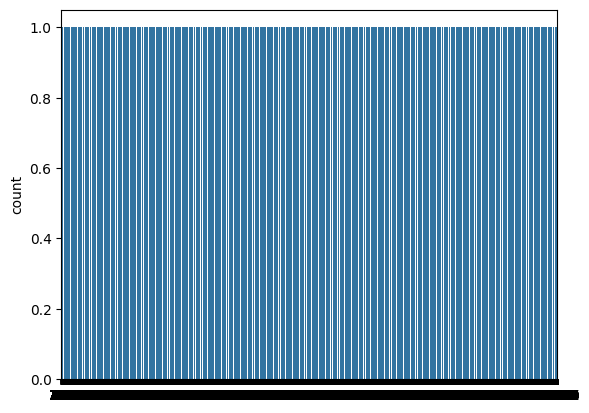

In [13]:
import seaborn as sns

y = df["diabetes"]

sns.countplot(y)


target_temp = df.diabetes.value_counts()

print(target_temp)

In [14]:
print("Percentage of patience with diabetese problems: "+str(y.where(y==1).count()*100/100000))
print("Percentage of patience without diabetes problems: "+str(y.where(y==0).count()*100/100000))

Percentage of patience with diabetese problems: 8.5
Percentage of patience without diabetes problems: 91.482


### Splitting Data


In [15]:
df1 = df.copy()

In [16]:
df1.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [17]:
dummies = pd.get_dummies(df1[['gender','smoking_history']])
dummies.head()

,gender_Female,gender_Male,smoking_history_No Info,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,True,False,False,False,False,False,True,False
1,True,False,True,False,False,False,False,False
2,False,True,False,False,False,False,True,False
3,True,False,False,True,False,False,False,False
4,False,True,False,True,False,False,False,False


In [18]:
df2 = pd.concat([df1,dummies],axis=1)
df2.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,gender_Female,gender_Male,smoking_history_No Info,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,Female,80.0,0,1,never,25.19,6.6,140,0,True,False,False,False,False,False,True,False
1,Female,54.0,0,0,No Info,27.32,6.6,80,0,True,False,True,False,False,False,False,False
2,Male,28.0,0,0,never,27.32,5.7,158,0,False,True,False,False,False,False,True,False
3,Female,36.0,0,0,current,23.45,5.0,155,0,True,False,False,True,False,False,False,False
4,Male,76.0,1,1,current,20.14,4.8,155,0,False,True,False,True,False,False,False,False


In [19]:
df2.drop(columns=['gender', 'smoking_history'],axis=1,inplace=True)

In [20]:
X = df2.drop(columns=['diabetes'])
X

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,gender_Female,gender_Male,smoking_history_No Info,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,80.0,0,1,25.19,6.6,140,True,False,False,False,False,False,True,False
1,54.0,0,0,27.32,6.6,80,True,False,True,False,False,False,False,False
2,28.0,0,0,27.32,5.7,158,False,True,False,False,False,False,True,False
3,36.0,0,0,23.45,5.0,155,True,False,False,True,False,False,False,False
4,76.0,1,1,20.14,4.8,155,False,True,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,80.0,0,0,27.32,6.2,90,True,False,True,False,False,False,False,False
99996,2.0,0,0,17.37,6.5,100,True,False,True,False,False,False,False,False
99997,66.0,0,0,27.83,5.7,155,False,True,False,False,False,True,False,False
99998,24.0,0,0,35.42,4.0,100,True,False,False,False,False,False,True,False


In [21]:
y = df2.diabetes

In [23]:
from sklearn.model_selection import train_test_split # import train_test_split function
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [49]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC

#Random Forest
rf_model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)

#Neural Netwrok
nn_model = MLPClassifier(hidden_layer_sizes=(10, 5), max_iter=1000, random_state=42)

#SVM
svm_model = svm.SVC(kernel='linear')

In [28]:
rf_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, random_state=42)

In [29]:
nn_model.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(10, 5), max_iter=1000, random_state=42)

In [30]:
svm_model.fit(X_train, y_train)

SVC(kernel='linear')

In [31]:
rf_score = rf_model.score(X_test, y_test)

In [32]:
nn_score = nn_model.score(X_test, y_test)

In [33]:
svm_score = svm_model.score(X_test, y_test)

In [34]:
print("Random Forest Score:", rf_score)

Random Forest Score: 0.710682152797387


In [35]:
print("Neural Network Score", nn_score)


Neural Network Score 0.9566935040256038


In [36]:
print("SVM Score:", svm_score)

SVM Score: 0.9591438715807371


# Model Evaluasi

In [37]:
# evaluate model
y_pred_rf = rf_model.predict(X_test)

In [39]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("RandomForest:")
print("MAE:", mae_rf)
print("MSE:", mse_rf)
print("RMSE:", rmse_rf)
print("R-squared:", r2_rf)

RandomForest:
MAE: 0.04630755425443555
MSE: 0.02340129715215065
RMSE: 0.15297482522346822
R-squared: 0.710682152797387


In [40]:
y_pred_nn = nn_model.predict(X_test)

In [41]:
mae_nn = mean_absolute_error(y_test, y_pred_nn)
mse_nn = mean_squared_error(y_test, y_pred_nn)
rmse_nn = np.sqrt(mse_nn)
r2_nn = r2_score(y_test, y_pred_nn)

print("Neural Network:")
print("MAE:", mae_nn)
print("MSE:", mse_nn)
print("RMSE:", rmse_nn)
print("R-squared:", r2_nn)

Neural Network:
MAE: 0.04330649597439616
MSE: 0.04330649597439616
RMSE: 0.20810212871183265
R-squared: 0.4645877062396331


In [42]:
y_pred_svm = svm_model.predict(X_test)

In [43]:
mae_svm = mean_absolute_error(y_test, y_pred_svm)
mse_svm = mean_squared_error(y_test, y_pred_svm)
rmse_svm = np.sqrt(mse_svm)
r2_svm = r2_score(y_test, y_pred_svm)

print("SVM:")
print("MAE:", mae_svm)
print("MSE:", mse_svm)
print("RMSE:", rmse_svm)
print("R-squared:", r2_svm)

SVM:
MAE: 0.04085612841926289
MSE: 0.04085612841926289
RMSE: 0.20212898955682454
R-squared: 0.4948823972260741


SVM


In [44]:
from sklearn.metrics import accuracy_score

In [53]:
from sklearn import svm

# y_pred_svm = svm_model.predict(X_test)

svm_model.fit(X_train, y_train)

Y_pred_svm = svm_model.predict(X_test)

In [54]:
Y_pred_svm.shape

(19997,)

In [55]:
score_svm = round(accuracy_score(y_pred_svm,y_test)*100,2)

print("The accuracy score achieved using Linear SVM is: "+str(score_svm)+" %")

The accuracy score achieved using Linear SVM is: 95.91 %


NN

In [56]:
from keras.models import Sequential
from keras.layers import Dense

In [60]:
print(X_train.shape)

(79985, 14)


In [61]:
model = Sequential()
model.add(Dense(11,activation='relu',input_dim=14))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [62]:
model.fit(X_train,y_train,epochs=10)

Epoch 1/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8499 - loss: 1.0591
Epoch 2/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9282 - loss: 0.2309
Epoch 3/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.9364 - loss: 0.1887
Epoch 4/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9432 - loss: 0.1648
Epoch 5/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.9483 - loss: 0.1491
Epoch 6/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.9527 - loss: 0.1378
Epoch 7/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9536 - loss: 0.1352
Epoch 8/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9556 - loss: 0.1298
Epoch 9/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9558 - loss: 0.1266
Epoch 10/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9557 - loss: 0.1253


In [63]:
Y_pred_nn = model.predict(X_test)

625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


In [64]:
Y_pred_nn.shape

(19997, 1)

In [65]:
rounded = [round(x[0]) for x in Y_pred_nn]

Y_pred_nn = rounded

In [66]:
score_nn = round(accuracy_score(Y_pred_nn,y_test)*100,2)

print("The accuracy score achieved using Neural Network is: "+str(score_nn)+" %")

#Note: Accuracy of 85% can be achieved on the test set, by setting epochs=2000, and number of nodes = 11.

The accuracy score achieved using Neural Network is: 95.8 %


Random Forest

In [67]:
from sklearn.ensemble import RandomForestClassifier

max_accuracy = 0


for x in range(100):
    rf = RandomForestClassifier(random_state=x)
    rf.fit(X_train,y_train)
    Y_pred_rf = rf.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_rf,y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x

#print(max_accuracy)
#print(best_x)

rf = RandomForestClassifier(random_state=best_x)
rf.fit(X_train,y_train)
Y_pred_rf = rf.predict(X_test)

In [68]:
Y_pred_rf.shape

(19997,)

In [70]:
score_rf = round(accuracy_score(Y_pred_rf,y_test)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_rf)+" %")

The accuracy score achieved using Decision Tree is: 96.98 %


Final Score

In [71]:
scores = [score_rf,score_nn,score_svm]
algorithms = ["Random Forest","Neural Network","Support Vector Machine"]

for i in range(len(algorithms)):
    print("The accuracy score achieved using "+algorithms[i]+" is: "+str(scores[i])+" %")

The accuracy score achieved using Random Forest is: 96.98 %
The accuracy score achieved using Neural Network is: 95.8 %
The accuracy score achieved using Support Vector Machine is: 95.91 %


<Axes: xlabel='Algorithms', ylabel='Accuracy score'>

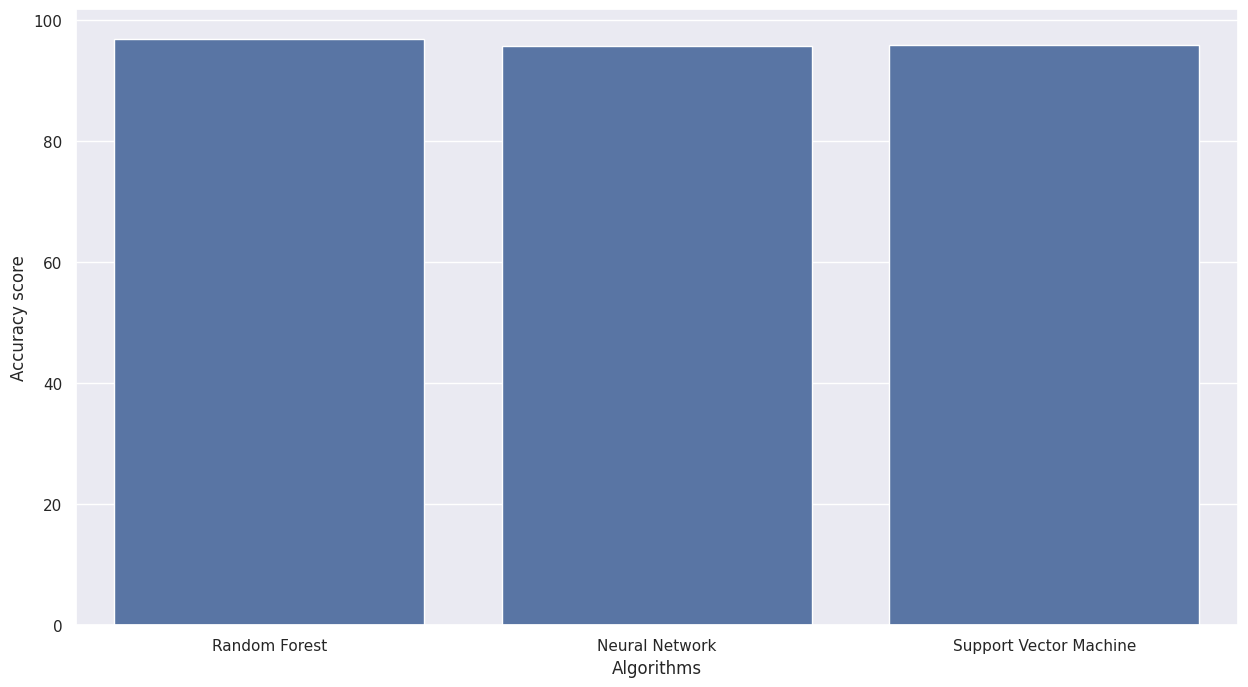

In [74]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(rc={'figure.figsize':(15,8)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")

sns.barplot(x=algorithms, y=scores)